In [2]:
import folium
import numpy as np
import matplotlib.pyplot as pd
import pandas as pd

1. A map of movement (Folium)

In [3]:
from math import radians, cos, sin, asin,sqrt
def haversine(lon1,lat1,lon2,lat2):
    lon1, lat1, lon2, lat2 = map(radians,[lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return c * r 

In [4]:
data = pd.read_csv('GPS_data.csv')
data.head()

,Unnamed: 0,seconds_elapsed,longitude,latitude
0,0,3.703666,25.516165,65.071375
1,1,5.339879,25.516227,65.071393
2,2,5.680000,25.516240,65.071398
3,3,6.311351,25.516264,65.071394
4,4,7.323929,25.516267,65.071396


In [5]:
lat = data['latitude']
lon = data['longitude']

data['dist'] = np.zeros(lat.shape[0])
data['time_diff'] = np.zeros(lat.shape[0])

for i in range(lat.shape[0]-1):
    data['dist'][i] = haversine(lon[i], lat[i], lon[i+1], lat[i+1]) * 1000
    data['time_diff'][i] = data['seconds_elapsed'][i+1] - data['seconds_elapsed'][i]

data['dist'][0] = 0
data['total_dist'] = data['dist'].cumsum()
data['velocity'] = data['dist'] / data['time_diff']
data['acceleration'] = (data['velocity'].diff()) / (data['seconds_elapsed'].diff())


C:\Users\shovo\AppData\Local\Temp\ipykernel_13856\58481600.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['dist'][i] = haversine(lon[i], lat[i], lon[i+1], lat[i+1]) * 1000
C:\Users\shovo\AppData\Local\Temp\ipykernel_13856\58481600.

In [9]:
# Extract latitude and longitude for visualization
location_frame = data[['latitude', 'longitude']]
location_list = location_frame.values.tolist()

# Calculate average latitude and longitude for map center
ave_lat = np.mean(location_list, axis=0)[0]
ave_lon = np.mean(location_list, axis=0)[1]

# Create Folium map
my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=16)

# Add polyline to the map
folium.PolyLine(location_list, color="red", weight=2.2, opacity=1).add_to(my_map)

# Display the map
my_map

2. Distance graph (increasing from zero)

In [10]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total Distance m')

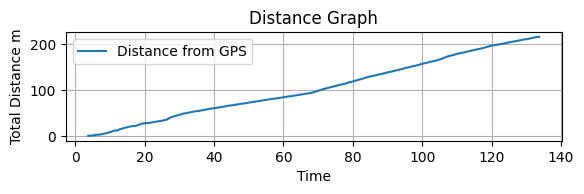

In [12]:
plt.subplot(3,1,2)
plt.plot(data['seconds_elapsed'],data['total_dist'])
plt.legend(['Distance from GPS'])
plt.grid()
plt.title('Distance Graph')
plt.xlabel('Time')
plt.ylabel('Total Distance m')
